In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
heart = pd.read_csv("C:\\Users\\melchiz shroff\\Downloads\\heart.csv")

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#The class counts
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The dataset is balanced with binary classes

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


cp variable stands for severity of cerebral palsy and data ranges 

0 - NO CP
1- MILD CP
2- MODERATE CP
3- SEVERE CP

In [11]:
heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [12]:
heart['fbs'].unique()

array([1, 0], dtype=int64)

In [13]:
heart['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
heart['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

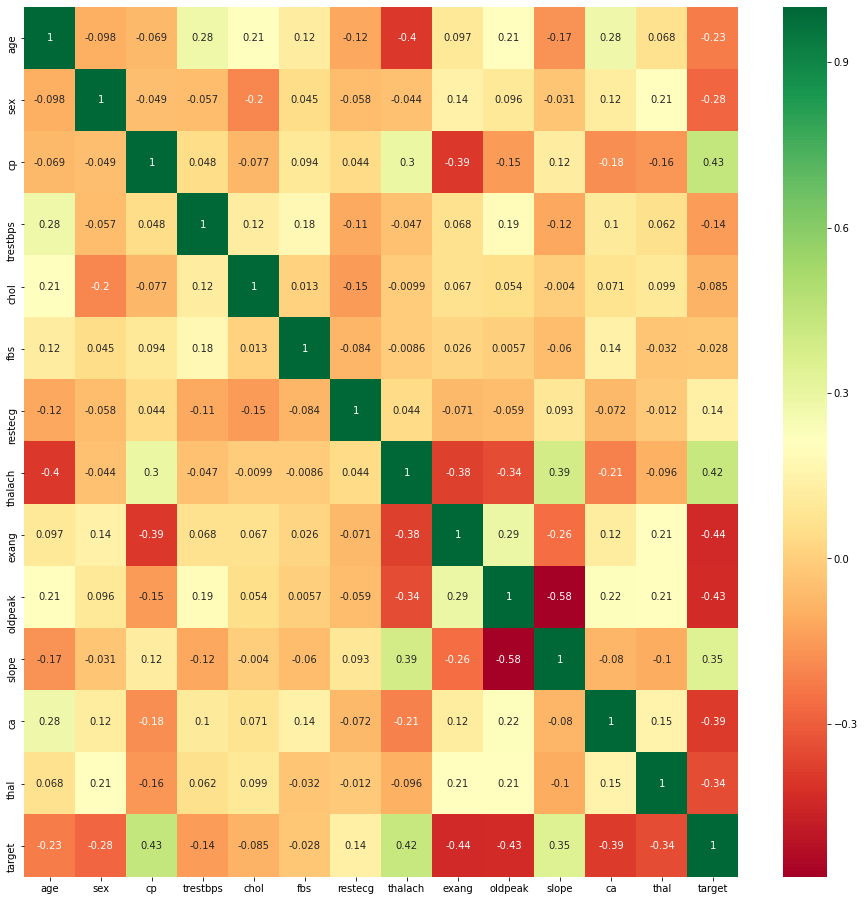

In [17]:
#Plotting correlation heatmap
corrmat = heart.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(heart[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

When compared to other variables- cp (cerebral palsy) , thalach(maximum heart rate achieved) have slightly higher positive correlation whereas thal and ca have have negative correlation towards our target variable.

PREPROCESSING OF DATA

In [23]:
#One hot encoding for categorical variable and standardizing the numerical data

data = pd.get_dummies(heart,columns=['sex','cp','fbs','restecg','ca','thal','exang','slope'])

from sklearn.preprocessing import StandardScaler

sd= StandardScaler()

data[['age','trestbps', 'chol', 'thalach', 'oldpeak']]= sd.fit_transform(data[['age','trestbps', 'chol', 'thalach', 'oldpeak']])

In [24]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [25]:
#Separating the data and splitting train n test set
from sklearn.model_selection import train_test_split

X= data.drop(['target'],axis=1)
y= data[['target']]

xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

rfmod = rf.fit(xtrain,ytrain)
ypred_rf = rfmod.predict(xtest)

C:\Users\melchiz shroff\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [34]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [33]:
class1= confusion_matrix(ytest,ypred_rf)
print(class1)

[[34 10]
 [ 6 41]]


In [35]:
roc_score_rf = roc_auc_score(ytest,ypred_rf)
print(roc_score_rf)

0.8225338491295938


In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lrmod = lr.fit(xtrain,ytrain)

ypred_lr = lrmod.predict(xtest)

class2= confusion_matrix(ytest,ypred_lr)
print(class2)
print(" ")

roc_score_lr = roc_auc_score(ytest,ypred_lr)
print(roc_score_lr)

[[35  9]
 [ 5 42]]
 
0.8445357833655706


C:\Users\melchiz shroff\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
